Epsilon-Greedy Q-values: [ 0.20900952 -0.38742719  0.80540302  0.91138409 -0.42552939 -0.79223973
 -0.74008947  1.38332195 -1.0533061  -0.25815094]
Total reward (Epsilon-Greedy): 549.53

Softmax Q-values: [ 0.18224472 -0.40450013  0.92363238  0.8402323  -0.34498665 -0.51266942
 -1.46976954  1.45377534 -0.92591516 -3.1951267 ]
Total reward (Softmax): 535.24


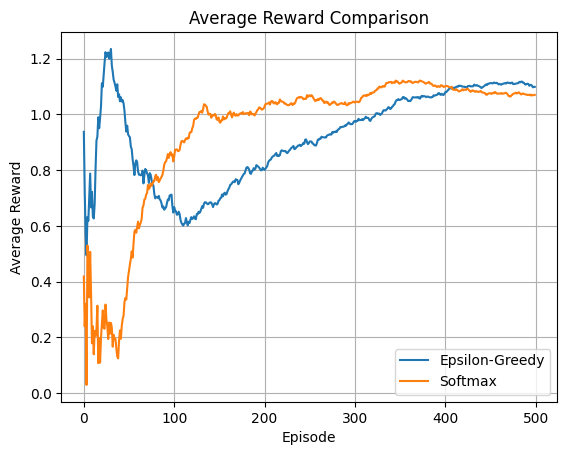

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBanditEnv:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.q_true = np.random.normal(0, 1, n_arms)
        self.best_action = np.argmax(self.q_true)
        self.reset()
    def reset(self):
        return None
    def step(self, action):
        reward = np.random.normal(self.q_true[action], 1)
        return None, reward, False, False, {}
        
def run_epsilon_greedy(env, episodes=500, epsilon=0.1):
    k = env.n_arms
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []
    for _ in range(episodes):
        env. reset ()
        action = np.random.choice(k) if np.random.rand() < epsilon else np.argmax(Q)
        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards.append(reward)
    return Q, rewards
    
def run_softmax(env, episodes=500, temperature=0.5):
    k = env.n_arms
    Q = np.zeros(k)
    N = np.zeros(k)
    rewards = []
    for _ in range(episodes):
        env. reset ()
        exp_q = np.exp((Q - np.max(Q)) / temperature)
        probabilities = exp_q / np.sum(exp_q)
        action = np.random.choice(k, p=probabilities)
        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards.append(reward)
    return Q, rewards

env = MultiArmedBanditEnv(n_arms=10)
q_eps, rewards_eps = run_epsilon_greedy(env, episodes=500, epsilon=0.1)
q_soft, rewards_soft = run_softmax(env, episodes=500, temperature=0.5)
print("Epsilon-Greedy Q-values:", q_eps)
print("Total reward (Epsilon-Greedy):", round(sum(rewards_eps), 2))
print("\nSoftmax Q-values:", q_soft)
print("Total reward (Softmax):", round(sum(rewards_soft), 2))
avg_reward_eps = np.cumsum(rewards_eps) / (np.arange(len(rewards_eps)) + 1)
avg_reward_soft = np.cumsum(rewards_soft) / (np.arange(len(rewards_soft)) + 1)
plt.plot(avg_reward_eps, label='Epsilon-Greedy' )
plt.plot(avg_reward_soft, label='Softmax' )
plt.xlabel('Episode' )
plt.ylabel('Average Reward' )
plt.title('Average Reward Comparison')
plt. legend ( )
plt.grid(True)
plt.show()